# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цели исследования:**

-изучить данные по Российскому кинопрокату

-обратить внимание,найти и сравнить текущие тренды фильмов при государственной поддержке и без нее

**Описание данных:**

-заказчик Министерство культуры Российской Федерации, данные взяты с портала открытых данных Министерства культуры

-данные поделенны на 2 df

-колонки имеют вид:

mkrf_movies:

title — название фильма;

puNumber — номер прокатного удостоверения;

show_start_date — дата премьеры фильма;

type — тип фильма;

film_studio — студия-производитель;

production_country — страна-производитель;

director — режиссёр;

producer — продюсер;

age_restriction — возрастная категория;

refundable_support — объём возвратных средств государственной поддержки;

nonrefundable_support — объём невозвратных средств государственной поддержки;

financing_source — источник государственного финансирования;

budget — общий бюджет фильма;

ratings — рейтинг фильма на КиноПоиске;

genres — жанр фильма

mkrf_shows:

puNumber — номер прокатного удостоверения;

box_office — сборы в рублях

**Краткий план работы:**

-соединить 2 df в один общий

-провести предобработку данных: устранить пропуски, дубликаты

-исследовать данные: найти закономерности, визуализировать результаты, сделать вывод с наглядными связями в данных относительно целевых переменных

## Общая информация

In [ ]:
import pandas as pd
df1 = pd.read_csv('/datasets/mkrf_movies.csv', sep = ',')
df1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**В данных первого df 7486 строк. Имеются типы данных вида: float64(3), object(12). Вероятнее всего в части колонок типы данных некорректны и придется их менять**

In [ ]:
df2 = pd.read_csv('/datasets/mkrf_shows.csv')
df2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Во втором df 3158 строк. Присутствуют 2 колонки типа int64 и float64. Объединять df будем по колонке puNumber.**

**Приведем  в df1 колонку puNumber к целочисленному значению для объединения таблиц df1 и df2 по этой колонке**

In [ ]:
df1.loc[df1['puNumber'] == 'нет', 'puNumber']

1797    нет
Name: puNumber, dtype: object

**Значение в колнке puNumber под индексом 1797 не дает перевести столбец в целочисленное значение заменим его на 0**

In [ ]:
df1.loc[df1['puNumber'] == 'нет', 'puNumber'] = 0

In [ ]:
df1['puNumber'] = df1['puNumber'].astype(int)
df1['puNumber'].unique()

array([221048915, 111013716, 221038416, ..., 124010819, 124010619,
       124010719])

**После приведения к int в puNumber объеденим df1 и df2 общий df по этой колонке**

In [ ]:
df = df1.merge(df2,on='puNumber', how='outer')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Вывод  по общей информации:
**Проведена работа по получения общего df из 2 исходных таблиц. Для объединения была проведена работа с колонкой puNumber и приведения ее типа в целочисленное значение и последующее слияние таблиц по данной колонке**

**В общем df у нас 7486 строк. Имеем 16 колонок с данными. Получившиеся типы данных в колонках имеют вид:float64(4), int64(1), object(11)**

## Предобработка данных

### Работа с пропусками и типами данных

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


**Имеем пропуски в колонках: producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office**

#### Гипотеза по refundable_support, nonrefundable_support, budget и financing_source

**Наиболее вероятно что пропуски в колонках refundable_support, nonrefundable_support, budget и financing_source-это пропуски в одних и тех же строках. Проверим это:**

In [ ]:
df.isna().mean()

title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002404
production_country       0.000267
director                 0.001202
producer                 0.075875
age_restriction          0.000000
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
ratings                  0.129174
genres                   0.130377
box_office               0.578146
dtype: float64

In [ ]:
len(df.loc[(df['refundable_support'].isna()) & (df['nonrefundable_support'].isna())
& (df['budget'].isna())
& (df['financing_source'].isna())])/len(df)

0.9556505476890195

**Так и есть, доли совпадают, это пропуски в одних и тех же строках**

**Проверим есть ли среди данных с этими пропусками данные в которых страна-производитель была бы Россией**

In [ ]:
len(df.loc[(df['refundable_support'].isna()) & (df['nonrefundable_support'].isna())
& (df['budget'].isna())
& (df['financing_source'].isna()) & (df['production_country']) == 'Россия'])

0

**Исходя из результата, понимаем что пропуски у нас сосредоточенны в данных о зарубежном кинемотографе. Видимо это связанно с тем что фильмы снимаются на негосударственный бюджет**

#### Пропуски в: refundable_support, nonrefundable_support, budget, box_office

**Заменять пропуски в этих данных значениеми mean, median, mode некорректно тк они могут серьезно исказить результат иследовательского анализа**

In [ ]:
len(df[df['refundable_support'] == 0])

221

In [ ]:
len(df[df['nonrefundable_support'] == 0])

9

In [ ]:
len(df[df['budget'] == 0])

17

In [ ]:
len(df[df['box_office'] == 0])

24

**Заменять 0-ем пропуски тоже некоректно, даже если предположить что мы не будем его учитывать то мы пропустим значения которые исходно были равны 0 и имеют 'вес' в данных**

#### Пропуски в financing_source

**Будем считать что если значение ячейки financing_source является nan то источник государственного финансирования будет 'неизвестен'**

In [ ]:
df.loc[df['financing_source'].isna(), 'financing_source'] = 'неизвестно'
df['financing_source'].unique()

array(['неизвестно', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

#### Пропуски в film_studio

**Будем считать что если значение ячейки film_studio является nan то студия-производитель будет 'неизвестна'**

In [ ]:
df.loc[df['film_studio'].isna(), 'film_studio'] = 'неизвестно'
df['film_studio'].unique()[range(5)]

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
       'Пульсар Продюксьон, ТФ1 Фильм '], dtype=object)

#### Пропуски в production_country

**Будем считать что если значение ячейки production_country является nan то страна-производитель будет 'неизвестна'**

In [ ]:
df.loc[df['production_country'].isna(), 'production_country'] = 'неизвестно'
df['production_country'].unique()[range(5)]

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания'], dtype=object)

#### Пропуски в director

**Будем считать что если значение ячейки director является nan то режиссёр будет 'неизвестен'**

In [ ]:
df.loc[df['director'].isna(), 'director'] = 'неизвестно'
df['director'].unique()[range(5)]

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов'], dtype=object)

#### Пропуски в producer

**Будем считать что если значение ячейки producer является nan то продюсер будет 'неизвестен'**

In [ ]:
df.loc[df['producer'].isna(), 'producer'] = 'неизвестно'
df['producer'].unique()[range(5)]

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит',
       'Джон Пенотти, Джон Туртурро', 'Патрис Леду'], dtype=object)

#### Работа с ratings

**Проруски в ratings не имеем право заполнять каким либо значением тк это будет недостоверной информацией**

In [ ]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

**Некоторые значения в ratings имеют вид записи в процентах в отличии от большенства значений записанных по 10 бальной системе оценивания**

**приведем их к общему виду**

In [ ]:
def ratings_record_type(meaning):
    try:
        if '%' in meaning:
            return str(int(meaning[:2])/10)
        else:
            return meaning
    except:
        return meaning

In [ ]:
df['ratings'] = df['ratings'].apply(ratings_record_type)
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4', '3.1',
       '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3', '1.8',
       '1.2', '1.7', '9.8'], dtype=object)

**Приведем колонку ratings к float значению, тк логически представлять рейтинг фильма на КиноПоиске числом с плавающей точкой с округлением до десятых долей**

In [ ]:
df['ratings'] = df['ratings'].astype(float)
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Пропуски в genres

**Будем считать что если значение ячейки genres является nan то жанр фильма будет 'неизвестен'**

In [ ]:
df.loc[df['genres'].isna(), 'genres'] = 'неизвестно'
df['genres'].unique()[range(5)]

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия'],
      dtype=object)

### Работа с дубликатами

In [ ]:
df.duplicated().sum()

0

**Явных дубликатов нет**

#### Дубликаты в puNumber

**Проверим дубликаты по прокатным удостоверениям(puNumber)**

In [ ]:
df[df['puNumber'].duplicated() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.8,"комедия,криминал",NaN


In [ ]:
df[(df['puNumber'] == 221154310) | (df['puNumber'] == 221054410)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.8,"комедия,криминал",NaN


<div class="alert alert-info">
    
    
**Не знаю можно ли выпускать в прокат 2 фильма под одним прокатным удостоверением, возможно это случилось из-за технического сбоя, оставлю как есть** </div>

#### Дубликаты по title

**Проверим дубликаты по всем столбцам кроме прокатных удостоверений**

In [ ]:
(len(df[df[['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director', 'producer',
            'age_restriction', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source',
           'ratings', 'genres', 'box_office']].duplicated() == True]))

5

<div class="alert alert-info">
      
**Видим что имеются 5 значений дубликатов по всем столбцам кроме номера прокатного удостоверения, вероятно это случилось из-за технического сбоя при сборе информации**</div>

**Удалим их так как эти дубликаты будут влиять на результат исследовательского анализа**

In [ ]:
len(df)

7486

In [ ]:
df = df.drop_duplicates(['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director', 'producer',
            'age_restriction', 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source',
           'ratings', 'genres', 'box_office']).reset_index(drop=True)

<div class="alert alert-info">
    
    
Провел более тщательную отсечку дубликатов</div>

**Проверим как удалились значения дубликатов (посчитаем разность исходной длины df с получившейся длиной после удаления дубликатов, она должна совпадать с кол-ом найденных дубликатов)**

In [ ]:
7486-len(df)

5

**Проверим индексы**

In [ ]:
len(df)

7481

In [ ]:
df.tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7476,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,NaN,неизвестно,NaN
7477,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,5.4,"боевик,триллер",NaN
7478,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,NaN,неизвестно,NaN
7479,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,NaN,неизвестно,NaN
7480,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,6.3,"комедия,вестерн",NaN


### Работа с категориальными значениями

**Удалим пробелы в начале и конце значений категориальных переменных (приведем к общему регистру)**

#### Работа с type

In [ ]:
len(df['type'].unique())

8

In [ ]:
df['type'] = df['type'].str.strip()
len(df['type'].unique())

6

**Поправили значения type в которых встречались пробелы в начале или в конце строки**

In [ ]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**В оставшихся значениях type проблем не наблюдается**

#### Работа с film_studio

In [ ]:
len(df['film_studio'].unique())

5491

In [ ]:
df['film_studio'] = df['film_studio'].str.strip()
len(df['film_studio'].unique())


5463

**Поправили значения film_studio в которых встречались пробелы в начале или в конце строки**

In [ ]:
df['film_studio'].unique()[range(30)]

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       'Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл',
       'Пульсар Продюксьон, ТФ1 Фильм',
       'Киностудия "Мосфильм", Телевидение ВНР',
       'Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гипнотик, Калима Продакшнз, Лудлум Интертейнмент',
       'Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо Продакшнз, Альберт С.Рудди Продакшнз',
       'Потбойлер Продакшнз, Эпсилон Моушн Пикчерз, Скайон Филмз Лимитед, ЮК Филм Каунсил',
       'Кэтлей, Отель Продакшнс, Мунстоун Интертейнмент, Рэд Маллет Продакшнс',
       'Инишиэл Интертейнмент Групп, Мирамакс Филмз, Персистент Интертейнмент, Революшн Студиос, Зе Лэдд Компани',
       'Фильмове Студио Баррандов',
       'Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатурн Филмз,

**В значениях film_studio наблюдаем возможную проблему появления неявных дубликатов т.к. непонятен порядок при участии нескольких студий в одном значении**

**Создадим фунцию которая делит значение на список по разделителю',', сортирует его и возвращает обратно собирая в строку через ','**

In [ ]:
def sorted_func(row):
    try:
        if len(row.split(',')) == 1:
            return row
        elif len(row.split(',')) > 1:
            return ",".join(sorted(row.split(',')))
    except:
        return row

In [ ]:
df['film_studio_sort'] = df['film_studio'].apply(sorted_func)

**Сравним результат работы функции с исходным столбцом**

In [ ]:
df[['film_studio', 'film_studio_sort']].head(20)

,film_studio,film_studio_sort
0,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...","Бикон Пикчерз, Кобальт Пикчерз, Тиг Продакшнз..."
1,"Киностудия ""Мосфильм""","Киностудия ""Мосфильм"""
2,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...","Кикстарт Продакшнз, Марк Платт Продакшнз, Рил..."
3,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...","Кикстарт Продакшнз, Марк Платт Продакшнз, Рил..."
4,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...","Кикстарт Продакшнз, Марк Платт Продакшнз, Рил..."
5,"Киностудия ""Мосфильм""","Киностудия ""Мосфильм"""
6,"Киностудия ""Мосфильм""","Киностудия ""Мосфильм"""
7,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...","Айкон Интертейнмент Интернэшнл, Грин Стрит Фи..."
8,"Пульсар Продюксьон, ТФ1 Фильм","ТФ1 Фильм,Пульсар Продюксьон"
9,"Киностудия ""Мосфильм"", Телевидение ВНР","Телевидение ВНР,Киностудия ""Мосфильм"""


In [ ]:
len(df['film_studio'])

7481

In [ ]:
len(df['film_studio_sort'])

7481

**Неявных дубликатов после обработки столбца замечено не было**

**Заменим значения исходной колонки на отсортированную версию**

In [ ]:
df['film_studio'] = df['film_studio_sort']

**Удалим лишнюю колонку**

In [ ]:
del df['film_studio_sort']

#### Работа с production_country

In [ ]:
len(df['production_country'].unique())

951

In [ ]:
df['production_country'] = df['production_country'].str.strip()
len(df['production_country'].unique())

935

**Поправили значения production_country в которых встречались пробелы в начале или в конце строки**

In [ ]:
df['production_country'].unique()[range(30)]

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия'], dtype=object)

**В значениях production_country наблюдаем возможную проблему появления неявных дубликатов т.к. непонятен порядок при участии нескольких стран в одном значении, так же наблюдаем несколько видов разделителей(',', '-') и пробелы до и после разделителя**

**Создадим функцию которая работает по разделителю '-', фильтрует значение путем удаления лишних пробелов и собириает значение обратно в строку но уже с ','**

In [ ]:
def sort_production_country(production_country):
    try:
        if len(production_country.split('-')) == 1:
            return production_country
        elif len(production_country.split('-')) > 1:
            country = production_country.split('-')
            country_1 = []
            [country_1.append(count.strip()) for count in country]
            return ",".join(sorted(country_1))
    except:
        return production_country

In [ ]:
df['production_country_sort'] = df['production_country'].apply(sort_production_country)

**Сравним с исходной колонкой**

In [ ]:
df[['production_country' ,'production_country_sort']].tail(30)

,production_country,production_country_sort
7451,Россия,Россия
7452,Россия,Россия
7453,Великобритания - США,"Великобритания,США"
7454,Италия,Италия
7455,Россия,Россия
7456,Новая Зеландия - КНР,"КНР,Новая Зеландия"
7457,Россия,Россия
7458,Россия,Россия
7459,Россия,Россия
7460,Россия,Россия


**У нас остались не отсортированными значения которые изначально записывались через ','**

**Применим функцию которая сортирует значения с разделителем ','**

In [ ]:
df['production_country_sort'] = df['production_country_sort'].apply(sorted_func)

In [ ]:
df[['production_country' ,'production_country_sort']].tail(30)

,production_country,production_country_sort
7451,Россия,Россия
7452,Россия,Россия
7453,Великобритания - США,"Великобритания,США"
7454,Италия,Италия
7455,Россия,Россия
7456,Новая Зеландия - КНР,"КНР,Новая Зеландия"
7457,Россия,Россия
7458,Россия,Россия
7459,Россия,Россия
7460,Россия,Россия


In [ ]:
len(df['production_country'])

7481

In [ ]:
len(df['production_country_sort'])

7481

**Неявных дубликатов после обработки столбца замечено не было**

**Заменим значения исходной колонки на отсортированную версию**

In [ ]:
df['production_country'] = df['production_country_sort']

**Удалим лишнюю колонку**

In [ ]:
del df['production_country_sort']

#### Работа с director

In [ ]:
len(df['director'].unique())

4812

In [ ]:
df['director'] = df['director'].str.strip()
len(df['director'].unique())

4802

**Поправили значения director в которых встречались пробелы в начале или в конце строки**

In [ ]:
df['director'].unique()[range(50)]

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков',
       'М.Чиаурели', 'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев',
       'В.Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников',
       'Джонатан Кинг', 'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит',
       'Крис Нунан', 'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон',
       'Р.Быков', 'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков',
       'Н.Михалков', 'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер',
       'Оливье Маршал', 'С.Соловьев', 'Иоахим Реннинг, Эспен Сандберг',
       'Ролан Быков', 'Семен Туманов', 'Питер Сигал', 'М.Ромм'],
      dtype=object)

**В значениях director наблюдаем возможную проблему появления неявных дубликатов т.к. непонятен порядок при участии нескольких режиссеров в одном значении**

**Применим функцию которая сортирует значения с разделителем ','**

In [ ]:
df['director_sort'] = df['director'].apply(sorted_func)

**Сравним с исходной колонкой**

In [ ]:
df[['director' ,'director_sort']].head(30)

,director,director_sort
0,Кевин Костнер,Кевин Костнер
1,Е.Матвеев,Е.Матвеев
2,Тимур Бекмамбетов,Тимур Бекмамбетов
3,Тимур Бекмамбетов,Тимур Бекмамбетов
4,Тимур Бекмамбетов,Тимур Бекмамбетов
5,В.Абдрашитов,В.Абдрашитов
6,В.Меньшов,В.Меньшов
7,Джон Туртурро,Джон Туртурро
8,Эрик Беснард,Эрик Беснард
9,В.Титов,В.Титов


In [ ]:
len(df['director'])

7481

In [ ]:
len(df['director_sort'])

7481

**Неявных дубликатов после обработки столбца замечено не было**

#### Работа с producer

In [ ]:
len(df['producer'].unique())

5350

In [ ]:
df['producer'] = df['producer'].str.strip()
len(df['producer'].unique())

5335

**Поправили значения producer в которых встречались пробелы в начале или в конце строки**

In [ ]:
df['producer'].unique()[range(30)]

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'неизвестно',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит',
       'Джон Пенотти, Джон Туртурро', 'Патрис Леду',
       'Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг',
       'Клинт Иствуд, Том Розенберг, Альберт С.Рудди, Пол Хаггис',
       'Саймон Чэннинг Уильямс', 'Этчи Стро, Анни Стюарт, Майк Фиггис',
       'Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Харви Вайнстайн',
       'Норман Голуайтли, Энди Грош, Николас Кейдж, Эндрю Никкол, Крис Робертс, Филипп Русле',
       'Филиппа Кемпбелл', 'Луис Дюкью', 'Чарльз Уэйнсток',
       'Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, Корей Сэйнья, Дэвид Твайтс',
       'Норма Хейман, Боб Хоскинс',
       'Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин',
       'Мэтью Пэйн, Джулия Пэло',
       'Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Райнер, Эли Самаха',
       'Дженнифер Тодд, Сюзанн Тодд, Брэдли Дженкел, Энтони Катагас',
       'Стивен Спилберг, Люси Фишер, Дуглас Уик, Д

**В значениях producer наблюдаем возможную проблему появления неявных дубликатов т.к. непонятен порядок при участии нескольких продюсеров в одном значении**

**Применим функцию которая сортирует значения с разделителем ',' и сравним с исходной колонкой**

In [ ]:
df['producer_sort'] = df['producer'].apply(sorted_func)
df[['producer', 'producer_sort']].head(30)

,producer,producer_sort
0,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс","Джейк Эбертс, Кевин Костнер,Дэвид Валдес"
1,неизвестно,неизвестно
2,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","Джейсон Нетер, Марк Е.Платт, Яйн Смит,Джим Лемли"
3,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","Джейсон Нетер, Марк Е.Платт, Яйн Смит,Джим Лемли"
4,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","Джейсон Нетер, Марк Е.Платт, Яйн Смит,Джим Лемли"
5,неизвестно,неизвестно
6,неизвестно,неизвестно
7,"Джон Пенотти, Джон Туртурро","Джон Туртурро,Джон Пенотти"
8,Патрис Леду,Патрис Леду
9,неизвестно,неизвестно


In [ ]:
len(df['producer'].unique())

5335

In [ ]:
len(df['producer_sort'].unique())

5330

**Сортировка выявила 5 неявных дубликатов, заменим значения исходной колонки отсортированными значениями**

In [ ]:
df['producer'] = df['producer_sort']

**Удалим лишнюю колонку**

In [ ]:
del df['producer_sort']

#### Работа с age_restriction

In [ ]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

**В значениях age_restriction проблем не наблюдается**

#### Работа с financing_source

In [ ]:
df['financing_source'].unique()

array(['неизвестно', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**В значениях financing_source проблем не наблюдается**

#### Работа с genres

In [ ]:
df['genres'].unique()[range(30)]

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестно'], dtype=object)

**В значениях genres наблюдаем возможную проблему появления неявных дубликатов т.к. непонятен порядок при нескольких жанров в одном значении**

**Применим функцию которая сортирует значения с разделителем ',' и сравним с исходной колонкой**

In [ ]:
df['genres_sort'] = df['genres'].apply(sorted_func)
df[['genres', 'genres_sort']].head(20)

,genres,genres_sort
0,"боевик,драма,мелодрама","боевик,драма,мелодрама"
1,"драма,военный","военный,драма"
2,"фантастика,боевик,триллер","боевик,триллер,фантастика"
3,"фантастика,боевик,триллер","боевик,триллер,фантастика"
4,"фантастика,боевик,триллер","боевик,триллер,фантастика"
5,драма,драма
6,"мелодрама,комедия","комедия,мелодрама"
7,"мюзикл,мелодрама,комедия","комедия,мелодрама,мюзикл"
8,"комедия,криминал","комедия,криминал"
9,"мелодрама,комедия","комедия,мелодрама"


In [ ]:
len(df['genres'])

7481

In [ ]:
len(df['genres_sort'])

7481

**Неявных дубликатов после обработки столбца замечено не было**

**Заменять значения исходной колонки на отсортированную версию не будем т.к. нам в п.2.6. необходимо будет выделить гл. жанр и нам важен исходный порядок значений**

**Видим сокращение уникальных значений в категориальных переменных что нам дает возможность качественного изучения этих данных**

### Проверка количественных значений

In [ ]:
len(df[df['budget'].isna() == False])

332

In [ ]:
len(df[(df['budget'].isna() == False) & (df['refundable_support'].isna() == False) & (df['nonrefundable_support'].isna() == False)])

332

**Строки в которых ест значения по budget, refundable_support, nonrefundable_support это одни и те же значения**

In [ ]:
df[(df['nonrefundable_support'].isna() == False) & (df['production_country'] == 'Россия')]['production_country']

1281    Россия
1447    Россия
1496    Россия
1522    Россия
1790    Россия
         ...  
7459    Россия
7461    Россия
7469    Россия
7471    Россия
7473    Россия
Name: production_country, Length: 316, dtype: object

In [ ]:
df[(df['production_country'] != 'Россия') & (df['nonrefundable_support'].isna() == False)]['production_country']

1869                        Латвия, Франция,Россия
2130                                Россия,Украина
2535                                 Италия,Россия
2578                        Польша, Украина,Россия
2769               Великобритания, Германия,Россия
2782                               Германия,Россия
3350                               Германия,Россия
5839                                Армения,Россия
5961                         Россия,Словакия,Чехия
6241             Латвия, Чешская Республика,Россия
6671     Германия, Казахстан, Китай, Польша,Россия
6773                                 Сербия,Россия
7004                                 Грузия,Россия
7109                                  Китай,Россия
7166                                 Италия,Россия
7339                     Бельгия, Финляндия,Россия
Name: production_country, dtype: object

In [ ]:
len(df.loc[(df['refundable_support'].isna() == False) & (df['nonrefundable_support'].isna() == False)
& (df['budget'].isna() == False)])

332

In [ ]:
(len(df[(df['production_country'] != 'Россия') & (df['nonrefundable_support'].isna() == False)]['production_country']) +
 len(df[(df['nonrefundable_support'].isna() == False) & (df['production_country'] == 'Россия')]['production_country']))

332

**Все значения без пропусков в колонках budget, refundable_support, nonrefundable_support это фильмы со страной-производитель Россия или при участии России**

#### Проверим сумму по столбцам с поддержкой возвратной и безвозвратной и сравним её с общим указанным бюджетом

In [ ]:
df[['budget', 'nonrefundable_support', 'refundable_support']].sum()

budget                   4.224027e+10
nonrefundable_support    1.626169e+10
refundable_support       3.939000e+09
dtype: float64

In [ ]:
df['nonrefundable_support'].sum()/df['budget'].sum()

0.38498072752391815

**Наблюдаем что крупную часть бюджета составляют невозвратные средства государственной поддержки (38.4%)**

In [ ]:
df['refundable_support'].sum()/df['budget'].sum()

0.09325225380181999

**Часть бюджета составляют возвратные средства государственной поддержки (9.3%)**

In [ ]:
df['nonrefundable_support'].sum()/df['budget'].sum() + df['refundable_support'].sum()/df['budget'].sum()

0.47823298132573816

**Общая часть от бюджета невозвратных и возвратных средств государственной поддержки (47.8%)**

### Работа с show_start_date

#### Приведение show_start_date к формату даты 'to_datetime'

In [ ]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['show_start_date'].head()

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

#### Создание show_start_year (год проката)

In [ ]:
df['show_start_year'] = df['show_start_date'].dt.year
df['show_start_year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: show_start_year, dtype: int64

### Создание столбцов main_genres и main_director (гл. жанр и гл.  режисер)

In [ ]:
df[['director', 'genres']].head(20)

,director,genres
0,Кевин Костнер,"боевик,драма,мелодрама"
1,Е.Матвеев,"драма,военный"
2,Тимур Бекмамбетов,"фантастика,боевик,триллер"
3,Тимур Бекмамбетов,"фантастика,боевик,триллер"
4,Тимур Бекмамбетов,"фантастика,боевик,триллер"
5,В.Абдрашитов,драма
6,В.Меньшов,"мелодрама,комедия"
7,Джон Туртурро,"мюзикл,мелодрама,комедия"
8,Эрик Беснард,"комедия,криминал"
9,В.Титов,"мелодрама,комедия"


**Видим значения в колонках director и genres, они перечисленны через запятую. Вычленим из них значение до запятой**

**Для этого создадим функцию которая принимает на вход значения из director и genres, значение director сохраняем в список (позже создаем столбец main_director куда и войдут значения этого списка) а значение genres возвращаем из функции (функцию применяем на новый столбец main_genres)**

In [ ]:
def main(row):
    if len(row.split(',')) != 1:
        return row.split(',')[0]
    elif len(row.split(',')) == 1:
        return row

df['main_genres'] = df['genres'].apply(main)
df['main_director'] = df['director'].apply(main)

**Проверяем работоспособность фунции**

In [ ]:
df[['main_genres', 'main_director']].head(20)

,main_genres,main_director
0,боевик,Кевин Костнер
1,драма,Е.Матвеев
2,фантастика,Тимур Бекмамбетов
3,фантастика,Тимур Бекмамбетов
4,фантастика,Тимур Бекмамбетов
5,драма,В.Абдрашитов
6,мелодрама,В.Меньшов
7,мюзикл,Джон Туртурро
8,комедия,Эрик Беснард
9,мелодрама,В.Титов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

### Какая доля от общего бюджета состовляет гос. поддержка

**Создадим df куда войдут только те значения в которых нет пропусков по budget**

**Разделим количественную переменную budget на категории для построения сводной таблицы и сохраним в отдельной колонке**

In [ ]:
df_with_a_budget = df[df['budget'].isna() == False]
df_with_a_budget['budget_category'] = pd.qcut(df['budget'], 5)

/tmp/ipykernel_592/1964081936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_a_budget['budget_category'] = pd.qcut(df['budget'], 5)


**Создание сводной таблицы относительно budget_category по ср. значениям budget, refundable_support, nonrefundable_support**

In [ ]:
t = df_with_a_budget.groupby('budget_category')[['budget' ,'refundable_support', 'nonrefundable_support']].mean()
t

,budget,refundable_support,nonrefundable_support
budget_category,,,
"(-0.001, 39072234.6]",2.591298e+07,4.388060e+06,3.284807e+07
"(39072234.6, 55078000.0]",4.642900e+07,7.144412e+05,2.778788e+07
"(55078000.0, 84221587.6]",6.852270e+07,7.012832e+06,2.867197e+07
"(84221587.6, 169898140.0]",1.211715e+08,9.530303e+06,3.970549e+07
"(169898140.0, 2305074303.0]",3.719398e+08,3.740299e+07,1.151337e+08


**Добавление в сводную таблицу значений долей refundable_support, nonrefundable_support относительно бюджета**

In [ ]:
t['share_refundable_support'] = t['refundable_support']/t['budget']
t['share_nonrefundable_support'] = t['nonrefundable_support']/t['budget']
t

,budget,refundable_support,nonrefundable_support,share_refundable_support,share_nonrefundable_support
budget_category,,,,,
"(-0.001, 39072234.6]",2.591298e+07,4.388060e+06,3.284807e+07,0.169338,1.267630
"(39072234.6, 55078000.0]",4.642900e+07,7.144412e+05,2.778788e+07,0.015388,0.598503
"(55078000.0, 84221587.6]",6.852270e+07,7.012832e+06,2.867197e+07,0.102343,0.418430
"(84221587.6, 169898140.0]",1.211715e+08,9.530303e+06,3.970549e+07,0.078651,0.327680
"(169898140.0, 2305074303.0]",3.719398e+08,3.740299e+07,1.151337e+08,0.100562,0.309549


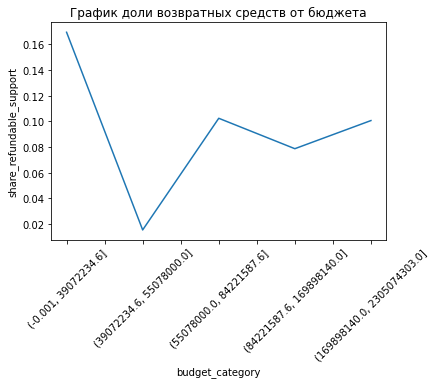

In [ ]:
t['share_refundable_support'].plot(rot=45, ylabel='share_refundable_support', title = 'График доли возвратных средств от бюджета').legend = False

**По графику можем наблюдать что доля возвратных средств гос.поддержки высокая при небольших бюджетах 0.17 и при повышении бюджета она снижается и варьируется от 0.015 до 0.1**

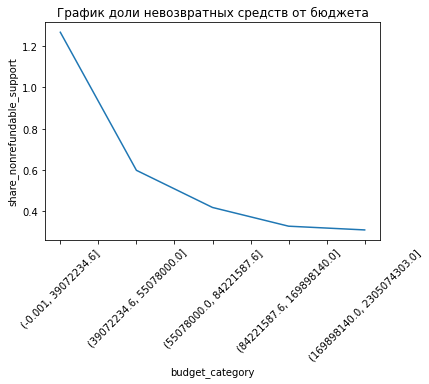

In [ ]:
t['share_nonrefundable_support'].plot(rot=45, ylabel='share_nonrefundable_support', title = 'График доли невозвратных средств от бюджета').legend = False

**По графику наблюдаем плавное снижении доли невозвратных средств от гос.поддержки. Видимо это связанно с лимитированной суммой поддержки на фильм**

**Так же наблюдаем долю равную 1.28 что не может быть правдой, проверим это в данных**

**Отсортируем df по ср.значению боджета на отрезке где находится 'аномальная' доля**

In [ ]:
df[df['budget'] < 25000000][['refundable_support', 'nonrefundable_support', 'budget']].head()

,refundable_support,nonrefundable_support,budget
2051,0.0,23000000.0,0.0
2056,0.0,75000000.0,0.0
2470,10000000.0,70000000.0,0.0
2530,20000000.0,0.0,0.0
2613,60000000.0,100000000.0,0.0


**Видим на данном отрезке с фильтрацией по бюджету что при 0 бюджете есть значения средств гос.поддержки**

**Посчитаем суммарную долю поддержки от бюджета**

In [ ]:
df['nonrefundable_support'].sum()/df['budget'].sum() + df['refundable_support'].sum()/df['budget'].sum()

0.47823298132573816

**Общая часть от бюджета невозвратных и возвратных средств государственной поддержки равна 47.8%**

### Вывод  по предобработке данных:

В данных оказались пропуски по продюсерам, возвартных и не возвратных средствах поддержки фильма, бюджету, рейтингу, жанру и бюджету.

Выяснилось что пропуски в 'refundable_support’, ‘nonrefundable_support’, ‘budget’ и ‘financing_source’ -- это пропуски в одних и тех же строках, и большинство пропусков в фильмах иностранного производства(возможно это связано с тем, что иностранные киностудии – частные, и не поддерживаются государственным бюджетом).

Я решил не заполнять пропуски в финансовом сегменте ('refundable_support’, ‘nonrefundable_support’, ‘budget’ и ‘financing_source’), так как это неккоректно, и приведет к неправильному выводу при анализе.

Так как нет возможности заполнить пропуски в студиях, страны производства, директора, продюсера, жанре, решил заполнить их константой = ‘неизвестно’

Также привел данные к общему типу, какой был бы для них логичным

Привел данные к общему регистру.

Создал столбцы главного жанра и главного режиссера для удобства представления данных.

Была выявлена особенность про возвратные средства, что доля возвратных средств гос.поддержки высокая при небольших бюджетах 0.17 и при повышении бюджета она снижается и варьируется от 0.015 до 0.1

Выявлена аномалия в данный что есть значения по средствам гос. поддержки при 0ом бюджете, возможно где не указан бюджет средства идут из гос.поддержки.


## Исследовательский анализ

### Исследование box_office

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

**Посчитаем какую долю состовляют фильмы с указанной информацией о прокате**

In [ ]:
1 - df['box_office'].isna().mean()

0.4221360780644299

**Создадим df куда войдут значения с известной информацией о прокате**

In [ ]:
df_with_a_box_office = df[df['box_office'].isna() == False]
df_with_a_box_office.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,director_sort,genres_sort,show_start_year,main_genres,main_director
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестно,«12+» - для детей старше 12 лет,NaN,...,NaN,неизвестно,8.3,"мелодрама,комедия",2700.0,В.Меньшов,"комедия,мелодрама",2013,мелодрама,В.Меньшов
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,неизвестно,8.0,"мелодрама,комедия",360.0,Ю.Чулюкин,"комедия,мелодрама",2016,мелодрама,Ю.Чулюкин
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,неизвестно,7.7,драма,420.0,"В.Усков,В.Краснопольский",драма,2016,драма,В.Краснопольский
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,неизвестно,8.7,"комедия,мелодрама,криминал",380.0,Л.Гайдай,"комедия,криминал,мелодрама",2013,комедия,Л.Гайдай
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,неизвестно,8.1,драма,1165.0,И.Бабич,драма,2013,драма,И.Бабич


**Сводная таблица по годам относительно box_office**

In [ ]:
t = df_with_a_box_office.groupby('show_start_year')['box_office'].agg(['count', 'mean', 'median'])
t

,count,mean,median
show_start_year,,,
2010,105,2.313004e+04,1700.000
2011,109,1.293832e+05,3000.000
2012,128,5.433924e+04,5660.000
2013,184,1.619549e+05,3522.500
2014,279,2.668442e+07,18160.000
2015,465,8.494057e+07,4920933.000
2016,526,9.100057e+07,3846679.410
2017,357,1.360328e+08,9968340.000
2018,475,1.045651e+08,8891102.210


**Создание столбца с информацией по кол-ву фильмов по годам, для последующего подсчета доли по годам**

In [ ]:
p = df.groupby('show_start_year')['title'].count()
p

show_start_year
2010    984
2011    622
2012    593
2013    629
2014    806
2015    705
2016    818
2017    505
2018    889
2019    930
Name: title, dtype: int64

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

**Добавление в сводную таблицу информации по кол-ву фильмов в общем и подсчет доли известной информации по сборам**

In [ ]:
t['count_general_df'] = p
t['share_box_office'] = t['count']/t['count_general_df']
t

,count,mean,median,count_general_df,share_box_office
show_start_year,,,,,
2010,105,2.313004e+04,1700.000,984,0.106707
2011,109,1.293832e+05,3000.000,622,0.175241
2012,128,5.433924e+04,5660.000,593,0.215852
2013,184,1.619549e+05,3522.500,629,0.292528
2014,279,2.668442e+07,18160.000,806,0.346154
2015,465,8.494057e+07,4920933.000,705,0.659574
2016,526,9.100057e+07,3846679.410,818,0.643032
2017,357,1.360328e+08,9968340.000,505,0.706931
2018,475,1.045651e+08,8891102.210,889,0.534308


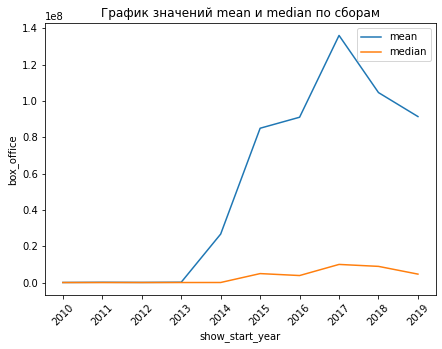

In [ ]:
x_ticks = []
[x_ticks.append(i) for i in range(2010, 2020)]
t[['mean', 'median']].plot(rot=45,figsize = [7, 5], xticks = x_ticks, ylabel='box_office', title = 'График значений mean и median по сборам').legend = False

In [ ]:
t['mean'].corr(t['share_box_office'])

0.9453914670304274

<div class="alert alert-info">

**По графику наблюдаем рост значения среднего, видим ощутимые различия между значениями среднего и медианы сборов начиная с 2014 года. Пик значения среднего мы наблюдаем в 2017 году, после чего начинается плавный спад. Высокий коэффицент корреляции значения среднего с долей известной информации нам говорит о том что чем больше известной информации тем больше ср. значение (и больше разрыв ср. значения с медианой)** V1</div>

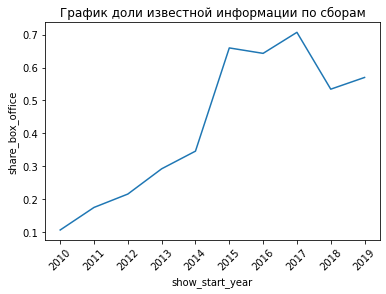

In [ ]:
x_ticks = []
[x_ticks.append(i) for i in range(2010, 2020)]
t['share_box_office'].plot(rot=45, ylabel='share_box_office', xticks = x_ticks, title = 'График доли известной информации по сборам').legend = False

**По графику наблюдаем тренд повышения доли известной информацией о прокате. Пик этой доли находится в 2017 году (0.71), меньше всего информации по 2010 году (0.11)**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

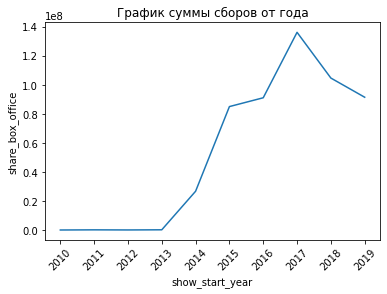

In [ ]:
x_ticks = []
[x_ticks.append(i) for i in range(2010, 2020)]
t['mean'].plot(rot=45, ylabel='share_box_office', xticks = x_ticks, title = 'График суммы сборов от года').legend = False

**По графику наблюдаем тренд повышения суммы сборов с 2014 года, в период 2010-2013 года сборы находились на низком уровне. Пик находится в 2017 году (136е+6), меньше всего было сборов в 2010 году (270е+2)**

### Исследование age_restriction

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**Отфильтруем наш df_with_a_box_office созданный в п.3.1 по годам 2015-2019**

In [ ]:
df_with_a_box_office_2015_2019 = df_with_a_box_office[df['show_start_year'] >= 2015]

/tmp/ipykernel_592/3568231166.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_with_a_box_office_2015_2019 = df_with_a_box_office[df['show_start_year'] >= 2015]


In [ ]:
df_with_a_box_office_2015_2019['show_start_year'].unique()

array([2016, 2015, 2017, 2018, 2019])

**Создаем сводную таблицу с информацией по сборам относительно годов и возрастного ограничения**

In [ ]:
t = df_with_a_box_office_2015_2019.pivot_table(index = 'show_start_year',columns = 'age_restriction', values= 'box_office', aggfunc = 'mean')
t

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,9.719348e+06,1.865217e+08,6.766739e+07,4.115385e+07,1.641849e+08
2016,3.664118e+06,1.488347e+08,9.156345e+07,4.499291e+07,1.721878e+08
2017,7.653298e+07,1.914982e+08,1.549177e+08,6.565643e+07,2.685809e+08
2018,6.489800e+06,2.129447e+08,1.057923e+08,4.893903e+07,1.486026e+08
2019,5.915356e+06,1.491788e+08,7.164842e+07,5.531036e+07,1.586734e+08


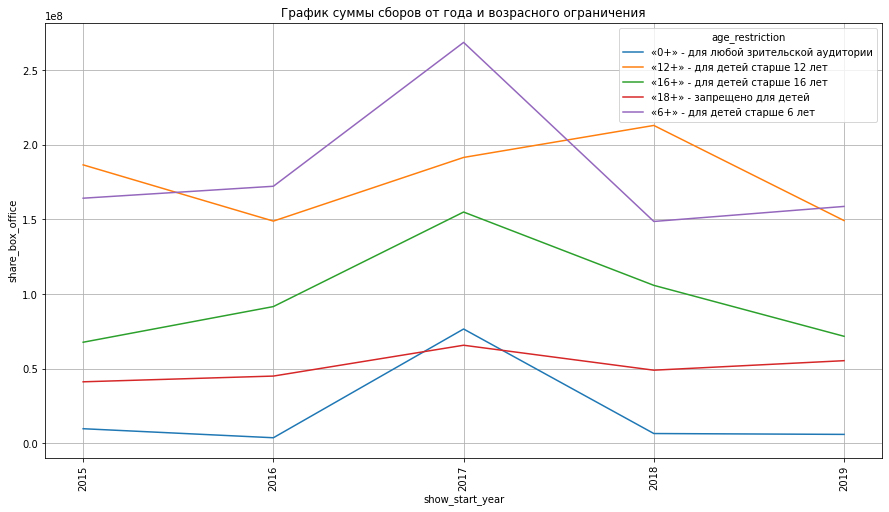

In [ ]:
x_ticks = []
[x_ticks.append(i) for i in range(2015, 2020)]
t[['«0+» - для любой зрительской аудитории', '«12+» - для детей старше 12 лет','«16+» - для детей старше 16 лет', '«18+» - запрещено для детей','«6+» - для детей старше 6 лет']].plot(rot=90, ylabel='share_box_office',figsize = [15, 8], title = 'График суммы сборов от года и возрасного ограничения',xticks = x_ticks, grid = True).legend = False

**По графику видно что сумма сборов в период с 2015-2019 года имеет ровный тренд. Заметны сильные колебания от возрастного ограничения: пики наблюдаются у возр. огр. 12+ и 6+, меньше собирают в прокате 0+ 18+, ближе к ср.значению категория 16+. Пиковое значение наблюдается в 2017г. у категории 6+ (268е+6), меньше всего значение в период 2016г. у категории 0+ (375е+4)**

### Исследование refundable_support, nonrefundable_support

**Создадим df куда войдут значения с известной информацией о го.поддержке**

In [ ]:
df_with_support = df[df['refundable_support'].isna() == False]
df_with_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,director_sort,genres_sort,show_start_year,main_genres,main_director
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Отражение"",АНО содействия р...",Россия,А.Атанесян,"М.Бабаханов, Р.Бутко,А.Атанесян",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,А.Атанесян,"драма,мелодрама",2013,драма,А.Атанесян
1447,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,неизвестно,28140.0,А.Якимчук,неизвестно,2014,неизвестно,А.Якимчук
1496,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","А.Котелевский, А.Олейников,Р.Давлетьяров",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,"С.Комаров,Р.Давлетьяров","комедия,фантастика",2013,комедия,Р.Давлетьяров
1522,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,55917.5,Е.Миндадзе (псевдоним Катя Шагалова),драма,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова)
1790,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"Л.Антонова,А.Миндадзе",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,232100.0,М.Угаров,драма,2014,драма,М.Угаров


**Создадим сводную таблицу по годам относительно сборов и построим график ср.значения**

In [ ]:
t = df_with_support.groupby(['show_start_year'])['box_office'].agg(['count', 'mean', 'median'])
t

,count,mean,median
show_start_year,,,
2013,2,1.016119e+07,10161192.55
2014,16,6.358889e+07,5504517.85
2015,85,6.806218e+07,9200824.50
2016,60,1.013618e+08,17921115.61
2017,39,2.785917e+08,50451949.00
2018,56,1.773941e+08,27023390.31
2019,60,1.401605e+08,25977291.30


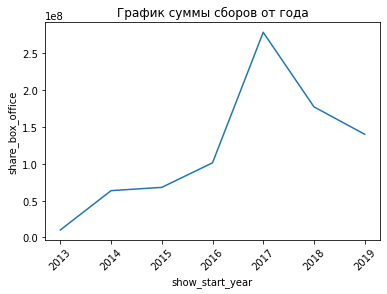

In [ ]:
t['mean'].plot(rot=45, ylabel='share_box_office', title = 'График суммы сборов от года').legend = False

**Добавим в сводную таблицу значения по сбору от всего df и сравним с показателями отфильтрованного df**

In [ ]:
p = df_with_a_box_office.groupby('show_start_year')['box_office'].agg(['count', 'mean', 'median'])
t['general_box_office_mean'] = p['mean']
t['asd'] = t['mean']/t['general_box_office_mean']

In [ ]:
t

,count,mean,median,general_box_office_mean,asd
show_start_year,,,,,
2013,2,1.016119e+07,10161192.55,1.619549e+05,62.740868
2014,16,6.358889e+07,5504517.85,2.668442e+07,2.382997
2015,85,6.806218e+07,9200824.50,8.494057e+07,0.801292
2016,60,1.013618e+08,17921115.61,9.100057e+07,1.113859
2017,39,2.785917e+08,50451949.00,1.360328e+08,2.047974
2018,56,1.773941e+08,27023390.31,1.045651e+08,1.696495
2019,60,1.401605e+08,25977291.30,9.136926e+07,1.534000


**В св.таблице наблюдаем значение доли равное 60 в 2013 году (это связанно с всего 2 аномально большими ср.значениями за 2013г.**

**Удалим их**

In [ ]:
t = t.drop(labels = [2013])

In [ ]:
t

,count,mean,median,general_box_office_mean,asd
show_start_year,,,,,
2014,16,6.358889e+07,5504517.85,2.668442e+07,2.382997
2015,85,6.806218e+07,9200824.50,8.494057e+07,0.801292
2016,60,1.013618e+08,17921115.61,9.100057e+07,1.113859
2017,39,2.785917e+08,50451949.00,1.360328e+08,2.047974
2018,56,1.773941e+08,27023390.31,1.045651e+08,1.696495
2019,60,1.401605e+08,25977291.30,9.136926e+07,1.534000


**Посчитаем во сколько в среднем сборы больше при гос. поддержке**

In [ ]:
t['asd'].mean()

1.596102873287044

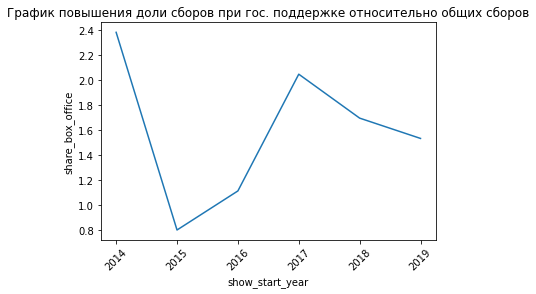

In [ ]:
t['asd'].plot(rot=45, ylabel='share_box_office', title = 'График повышения доли сборов при гос. поддержке относительно общих сборов').legend = False

**По графику видно что сборы при гос.поддержке в ~2 раза превышали ср.сборы в 2014, 2017 годах. Чуть меньше множитель наблюдаем в 2018, 2019 годах ~1.7. В 2015,2016 годы они соответствуют обычным сборам ~1**

### Исследование влияния на ретинг фильмов гос.поддержки

**Создадим сводную таблицу из общего df с рейтингом по годам и жанрам**

In [ ]:
p = df.groupby(['show_start_year', 'main_genres'])['ratings'].agg(['count', 'mean', 'median'])
p.head(30)


count      mean  median
show_start_year main_genres                             
2010            аниме                4  7.950000    8.10
                биография            2  6.700000    6.70
                боевик             113  6.853097    6.90
                военный              6  7.750000    7.85
                детектив             5  7.060000    7.00
                детский              2  1.550000    1.55
                документальный      20  7.360000    7.40
                драма              227  6.854626    7.00
                история              4  7.600000    7.60
                комедия             60  6.110000    6.45
                концерт              1  7.900000    7.90
                короткометражка      1  6.100000    6.10
                криминал             2  5.900000    5.90
                мелодрама           73  6.510959    6.70
                мультфильм          62  6.861290    7.30
                мюзикл               7  7.428571    7.60
                неизвестно           0       NaN     NaN
                приключения          3  6.766667    5.70
                семейный             1  5.700000    5.70
                триллер             77  6.884416    6.90
                ужасы               82  6.129268    6.20
                фантастика          72  6.954167    6.95
                фэнтези             87  6.739080    6.90
2011            аниме                8  7.562500    7.65
                биография            2  7.700000    7.70
                боевик              68  6.726471    6.80
                военный              3  6.800000    6.80
                детектив             4  7.000000    6.85
                детский              4  6.475000    7.20
                для взрослых         1  4.100000    4.10

**Сводная таблица с рейтингом и жанром по годам при гос.поддержке**

In [ ]:
t = df_with_support.groupby(['show_start_year', 'main_genres'])['ratings'].agg(['count', 'mean', 'median'])
t.head(30)


count      mean  median
show_start_year main_genres                         
2013            драма            1  8.100000    8.10
                комедия          1  5.300000    5.30
2014            драма            7  6.157143    6.40
                комедия          2  5.850000    5.85
                мелодрама        2  6.700000    6.70
                мультфильм       1  6.500000    6.50
                неизвестно       0       NaN     NaN
                семейный         2  4.400000    4.40
                фантастика       1  6.600000    6.60
2015            биография        1  7.500000    7.50
                боевик           2  6.700000    6.70
                военный          3  6.633333    6.70
                детектив         2  6.450000    6.45
                детский          2  7.000000    7.00
                драма           26  6.480769    6.35
                комедия         20  5.445000    5.30
                мелодрама        5  5.720000    5.70
                мультфильм       7  5.542857    6.10
                мюзикл           3  6.366667    6.10
                неизвестно       0       NaN     NaN
                спорт            1  7.000000    7.00
                триллер          5  6.180000    6.30
                ужасы            2  5.550000    5.55
                фантастика       1  9.400000    9.40
                фэнтези          3  6.533333    6.80
2016            военный          2  7.150000    7.15
                детский          1  7.300000    7.30
                драма           12  6.433333    6.35
                комедия         15  5.246667    5.40
                криминал         1  8.500000    8.50

**Добавим в общую сводную таблицу столбец со средним рейтингом при гос. поддержке для сравнения. Удалим лишние наблюдения из сводника (если nan у жанра при гос. поддержке) для наглядности при построении графика**

In [ ]:
p['mean_with_the_support'] = t['mean']
p = p.dropna (subset=['mean_with_the_support'])

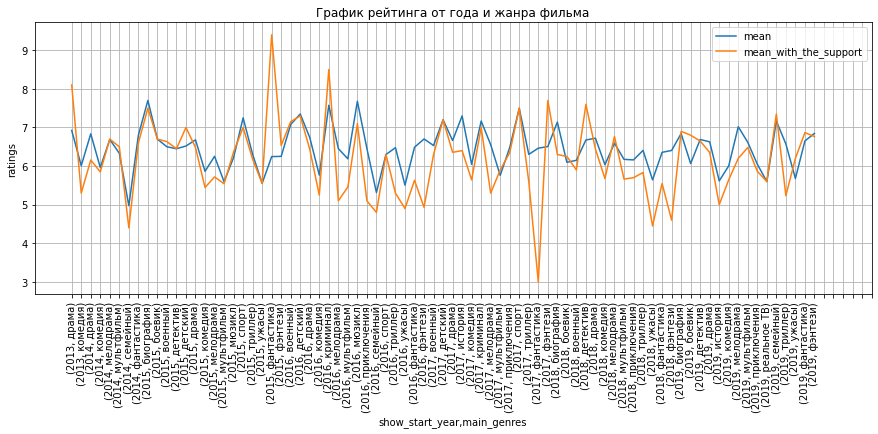

In [ ]:
x_ticks = []
[x_ticks.append(i) for i in range(85)]
p[['mean', 'mean_with_the_support']].plot(rot=90, ylabel='ratings',figsize = [15, 5], title = 'График рейтинга от года и жанра фильма', xticks = x_ticks, grid = True).legend = False

In [ ]:
p['mean_with_the_support'].mean()

6.180492209767924

In [ ]:
p['mean'].mean()

6.452825320276685

**По графику наблюдаем идентичные показателя рейтинга по жанрам и годам. В общем наблюдаем что рейтинг чуть выше у фильмов без гос. поддержки (на ~ 0.25). Пик превышения рейтинга у фильмов при гос. поддержке наблюдаем на значении 'фантастики в 2015 году' (~ 9.5 в сравнении  ~ 6.3). Наименьшие показатели у фильмов при гос. поддержке 'фантастики 2017 года' (~3 в сравнении ~6.5)**

**Исследуем конкретно отличия рейтинга по жанрам при гос. поддержке от рейтинга по жанрам без гос. поддержки**

**Создание сводных таблиц рейтинга по жанрам при гос. поддержке и без нее**

In [ ]:
t = df_with_support.groupby('main_genres')['ratings'].agg(['count', 'mean', 'median'])
p = df.groupby('main_genres')['ratings'].agg(['count', 'mean', 'median'])
t

,count,mean,median
main_genres,,,
биография,3,6.900000,6.90
боевик,6,6.583333,6.45
военный,9,6.466667,6.40
детектив,5,6.760000,6.80
детский,4,7.125000,7.25
драма,93,6.419355,6.40
история,4,5.350000,5.90
комедия,74,5.514865,5.75
криминал,3,7.500000,7.80


In [ ]:
p['mean_with_the_support'] = t['mean']
p = p.dropna (subset=['mean_with_the_support'])
p

,count,mean,median,mean_with_the_support
main_genres,,,,
биография,33,7.012121,6.90,6.900000
боевик,617,6.508914,6.70,6.583333
военный,46,6.726087,6.65,6.466667
детектив,56,6.646429,6.65,6.760000
детский,28,6.114286,7.20,7.125000
драма,1687,6.766983,6.80,6.419355
история,25,6.536000,6.40,5.350000
комедия,696,5.986063,6.10,5.514865
криминал,39,6.697436,6.70,7.500000


**Строим график рейтинга жанра для сравнения его при гос. поддержке и без нее**

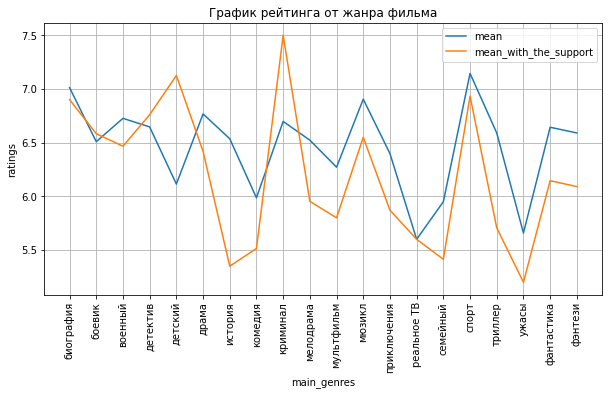

In [ ]:
x_ticks = []
[x_ticks.append(i) for i in range(20)]
p[['mean', 'mean_with_the_support']].plot(rot=90, ylabel='ratings',figsize = [10, 5], title = 'График рейтинга от жанра фильма', xticks = x_ticks, grid = True).legend = False

**По графику видим что рейтинг у жанров фильмов при гос. поддержке выше: детский (на ~0.9), кримнал(на ~0.9). Рейтинг ниже у жанров: история(на ~1), комедия(на ~0.5), мелодрама(на ~0.5), мультфильмы(на ~0.4), мюзикл(на ~0.4), приключения(на ~0.5), семейный(на ~0.5), триллер(на ~0.8), ужасы(на ~0.5), фантастика(на ~0.4), фентези(на ~0.4), военный(на ~0.2). Жанры:реальное, спорт, детектив, боевик и биография ~находятся на одном уровне по рейтингу.**

## Общий вывод

В проделанной работе есть промежуточные выводы,
в общем выводе я бы хотел обобщить их и подвести итог по работе с данными


<h3>Пропуски и дубликаты</h3>

Выяснилось что пропуски в 'refundable_support’, ‘nonrefundable_support’, ‘budget’ и ‘financing_source’ -- это пропуски в одних и тех же строках, и большинство пропусков в фильмах иностранного производства(возможно это связано с тем, что иностранные киностудии – частные, и не поддерживаются государственным бюджетом)

Я решил не заполнять пропуски в финансовом сегменте ('refundable_support’, ‘nonrefundable_support’, ‘budget’ и ‘financing_source’), так как это неккоректно, и приведет к неправильному выводу при анализе(нужно доработать/переработать систему сбора этих данных, для более полного анализа, и поиска корреляций).

Так как нет возможности заполнить пропуски в студиях, страны производства, директора, продюсера, жанре, решил заполнить их константой = ‘неизвестно’. В уникальных значениях «financing_source» видим, что там в основном мин культуры и фонд кино ,что может являться подтверждаением гипотезы о частном бизнесе в зарубежном кинематографе. В «film_studio» для более точного анализа, допустим, кассовости сборов определнной студии стоит переработать/доработать сбор данных в этой колонке.

В колонке «ratings» я привел все к единому типу(float) для корректного анализа и отображения (следует обратить внимание на сбор данных, так как некоторые значения были в процентах)

Один фильм имеет несколько прокатных удостоверений. Всего таких фильмов – 2, возможно случился тех сбой, оставил как они есть.

**Работа с категориальными значениями:**

Работа с «type» удалил пробелы в строках, дубликатов не выявлены

Работа с «film_studio» удалил пробелы в некоторых данных, дубликатов не выявлено

Работа с «production_country» удалил пробелы, дубликатов не выявлено

Работа с «director» удалены пробелы, дубликатов нет

Работа с «producer» удалил пробелы, дубликаты были – устранил

Вывел табличку «genres» уникальные значения и понял что, дубликатов нет

Работа с колонкой «budget» выявили что все значения без пропусков в колонках budget, refundable_support, nonrefundable_support это фильмы со страной-производитель Россия или при участии России
Наблюдали что крупную часть бюджета составляют невозвратные средства государственной поддержки (38.4%)

После работы с колонкой «show_start_date», а именно – привел к корректному формату времени, создал колонку года проката(show_start_date)

Создал столбцы main_genres и main_director (гл. жанр и гл.  режисер)

Выявлена аномалия в данный что есть значения по средствам гос. поддержки при 0ом бюджете, возможно где не указан бюджет средства идут из гос.поддержки.

Отвечая на вопрос - Какая доля от общего бюджета состовляет гос. Поддержка?

Общая часть от бюджета невозвратных и возвратных средств государственной поддержки равна 47.8%


<h3>Исследование данных</h3>

Был проведен анализ колонок, описаны, а также приведены графики по ключевым из них. Выбивающиеся значения были исключены из выборки, чтобы можно было провести корректный анализ

**<h4>Приведена сводная таблица и в виде графика проанализированна информация по количеству фильмов с неизвестной информацией по сборам:</h4>**

-пик известной информации приходится на 2017 год (71%)

-меньше всего информации по 2010 году (11%)

**<h4>Найденны пиковые и меньшие значения по сборам:</h4>**

-пик находится в 2017 году (136.000.000)

-меньше всего было сборов в 2010 году (27.000)

-в период 2010-2013 года сборы находились на низком уровне

**<h4>Проанализированна информация по возростному рейтингу фильмов в период 2015-2019 годов:</h4>**

-сумма сборов в период с 2015-2019 года имеет ровный тренд

-пиковые значения наблюдаются у возр. огр. 12+ и 6+

-меньше собирают в прокате 0+ и 18+

-ближе к ср.значению категория 16+

-пиковое значение наблюдается в 2017г. у категории 6+ (268.000.000)

-меньше всего значение в период 2016г. у категории 0+ (3.750.000)

**<h4>Проведенно сравнение сборов при гос. поддержке относительно средних сборов:</h4>**

-в среднем сборы больше при гос. поддержке в 1.6 раз

-сборы при гос.поддержке в ~2 раза превышали ср.сборы в 2014, 2017 годах. Чуть меньше множитель наблюдаем в 2018, 2019 годах ~1.7. В 2015,2016 годы они соответствуют обычным сборам ~1

**<h4>Исследованно как на рейтинг фильма по жанрам и годам влияет гос. поддержка:</h4>**

-рейтинг чуть выше у фильмов без гос. поддержки (на ~ 0.25)

-пик превышения рейтинга у фильмов при гос. поддержке наблюдаем на значении 'фантастики в 2015 году' (~ 9.5 в сравнении  ~ 6.3)

-наименьшие показатели у фильмов при гос. поддержке 'фантастики 2017 года' (~3 в сравнении ~6.5)

**<h4>Выявленны отличия рейтинга по жанрам при гос. поддержке от рейтинга по жанрам без гос. поддержки</h4>**

-рейтинг у жанров фильмов при гос. поддержке выше: детский (на ~0.9), кримнал(на ~0.9)

-рейтинг ниже у жанров: история(на ~1), комедия(на ~0.5), мелодрама(на ~0.5), мультфильмы(на ~0.4), мюзикл(на ~0.4), приключения(на ~0.5), семейный(на ~0.5), триллер(на ~0.8), ужасы(на ~0.5), фантастика(на ~0.4), фентези(на ~0.4), военный(на ~0.2)

-жанры:реальное, спорт, детектив, боевик и биография ~находятся на одном уровне по рейтингу